In [26]:
import pyarrow.parquet as pq
import pandas as pd

# Read the .parquet file
parquet_file = 'data.parquet'
table = pq.read_table(parquet_file)

# Convert the Arrow table to a Pandas DataFrame
df = table.to_pandas()
print(df)
df.rename(columns={'':'Time'})
print(df)


# Save the DataFrame to a .csv file
csv_file = 'output_file.csv'
df.to_csv(csv_file)

                     banknifty     nifty  tte
time                                         
2021-01-01 09:15:00   0.286058  0.199729   27
2021-01-01 09:16:00   0.285381  0.200433   27
2021-01-01 09:17:00   0.284233  0.200004   27
2021-01-01 09:18:00   0.286104  0.199860   27
2021-01-01 09:19:00   0.285539  0.198951   27
...                        ...       ...  ...
2022-06-30 15:26:00   0.240701  0.214758   28
2022-06-30 15:27:00   0.240875  0.216558   28
2022-06-30 15:28:00   0.242115  0.216794   28
2022-06-30 15:29:00   0.243426  0.216455   28
2022-06-30 15:30:00   0.241907  0.216081   28

[690512 rows x 3 columns]
                     banknifty     nifty  tte
time                                         
2021-01-01 09:15:00   0.286058  0.199729   27
2021-01-01 09:16:00   0.285381  0.200433   27
2021-01-01 09:17:00   0.284233  0.200004   27
2021-01-01 09:18:00   0.286104  0.199860   27
2021-01-01 09:19:00   0.285539  0.198951   27
...                        ...       ...  ...
2022-06

In [27]:
df=pd.read_csv('output_file.csv')
# print(df['nifty'].corr(df['banknifty']))
df['date'] = pd.to_datetime(df['time']).dt.strftime('%Y-%m-%d')
df['time']=pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
dfnew = df.between_time('09:15', '15:30')
df=dfnew
df.reset_index(inplace=True)
for column in df.columns:
    if df[column].dtype in [int, float]:  # Check if the column is numeric
        df[column] = df[column].fillna(
            (df[column].shift() +df[column].shift(-1)) / 2
        )

print(df)
holiday=[]
##now only keeping non holiday days
for dates in df['date'].unique():
    df_=df[df['date']==dates]
    if(len(df_['nifty'].unique())==1 or len(df_['banknifty'].unique())==1):
        holiday.append(dates)
print(holiday)
print(len(holiday))
df=df[~df['date'].isin(holiday)]
df.to_csv('temp.csv',index=False)




                      time  banknifty     nifty  tte        date
0      2021-01-01 09:15:00   0.286058  0.199729   27  2021-01-01
1      2021-01-01 09:16:00   0.285381  0.200433   27  2021-01-01
2      2021-01-01 09:17:00   0.284233  0.200004   27  2021-01-01
3      2021-01-01 09:18:00   0.286104  0.199860   27  2021-01-01
4      2021-01-01 09:19:00   0.285539  0.198951   27  2021-01-01
...                    ...        ...       ...  ...         ...
180851 2022-06-30 15:26:00   0.240701  0.214758   28  2022-06-30
180852 2022-06-30 15:27:00   0.240875  0.216558   28  2022-06-30
180853 2022-06-30 15:28:00   0.242115  0.216794   28  2022-06-30
180854 2022-06-30 15:29:00   0.243426  0.216455   28  2022-06-30
180855 2022-06-30 15:30:00   0.241907  0.216081   28  2022-06-30

[180856 rows x 5 columns]
['2021-01-02', '2021-01-03', '2021-01-09', '2021-01-10', '2021-01-16', '2021-01-17', '2021-01-23', '2021-01-24', '2021-01-26', '2021-01-30', '2021-01-31', '2021-02-06', '2021-02-07', '2021-02-1

{'2021-01-01': 0.9486672358020644, '2021-01-04': 0.6639353996950916, '2021-01-05': 0.65149264091439, '2021-01-06': 0.5659341224653235, '2021-01-07': 0.053210568540167626, '2021-01-08': 0.3124827838131912, '2021-01-11': 0.8201127231322991, '2021-01-12': 0.058540718986718254, '2021-01-13': 0.7784897853255452, '2021-01-14': 0.8729787732181401, '2021-01-15': 0.4869602992427339, '2021-01-18': 0.811727636710186, '2021-01-19': 0.9464102330003236, '2021-01-20': 0.9027302659305646, '2021-01-21': 0.8465337868263966, '2021-01-22': 0.903293731613484, '2021-01-25': 0.16007585652469128, '2021-01-27': 0.6940679616717246, '2021-01-28': 0.23439964251092524, '2021-01-29': 0.6994200906641254, '2021-02-01': 0.9781486308799029, '2021-02-02': 0.17745744823109794, '2021-02-03': 0.48507947524417777, '2021-02-04': 0.6085145828384932, '2021-02-05': 0.49277896083792194, '2021-02-08': 0.36046234424408585, '2021-02-09': 0.22595764936560822, '2021-02-10': 0.8257929964677005, '2021-02-11': 0.771739841315762, '2021-0

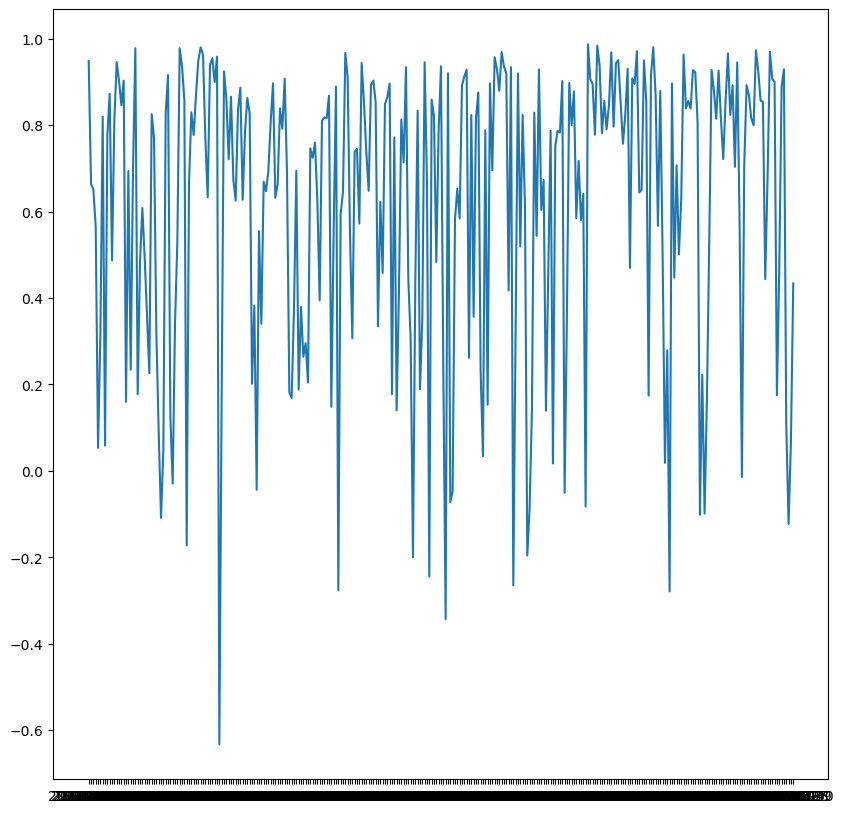

In [28]:
corr ={}
day_diffn=[]
day_diffb=[]
plt.figure(figsize=(10,10))
closeb,closen=-2,-2
for dates in df['date'].unique():
    df_=df[df['date']==dates]
    if(closen !=-2):
        day_diffn.append(abs(closen-df_.iloc[0]['nifty']))
    if(closeb !=-2):
        day_diffb.append(abs(closeb-df_.iloc[0]['banknifty']))
    closen=df_.iloc[-1]['nifty']
    closeb=df_.iloc[-1]['banknifty']
    corr[dates]=df_['nifty'].corr(df_['banknifty'])
print(corr)
plt.plot(corr.keys(),corr.values())
plt.show()


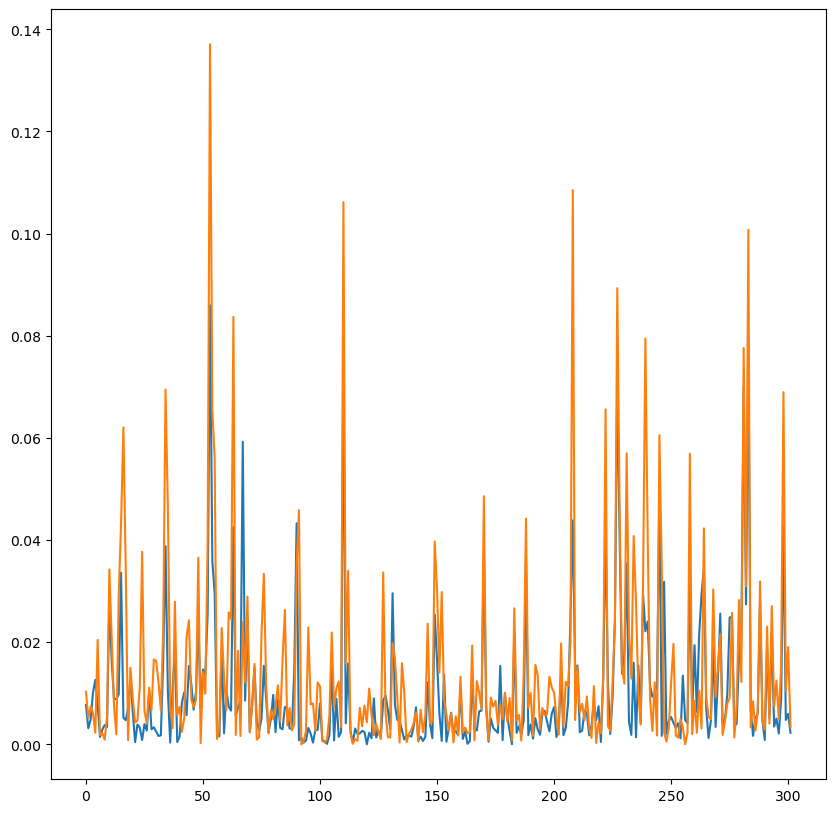

In [29]:
plt.figure(figsize=(10,10))
plt.plot(day_diffn)
plt.plot(day_diffb)
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['niftys']=scaler.fit_transform(df[['nifty']])
df['bankniftys']=scaler.fit_transform(df[['banknifty']])
# df.drop(columns=['signal'],inplace=True)
df.to_csv('final_out.csv',index=False)

/var/folders/p_/rsx23pcs0j98ttq4g2448_kc0000gn/T/ipykernel_22255/2464125502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['niftys']=scaler.fit_transform(df[['nifty']])
/var/folders/p_/rsx23pcs0j98ttq4g2448_kc0000gn/T/ipykernel_22255/2464125502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bankniftys']=scaler.fit_transform(df[['banknifty']])


In [31]:
df['iv_spread'] =  df['banknifty']-df['nifty']
print(df['iv_spread'].max())
print(df['iv_spread'].min())


0.2090555
-0.00753100000000001


/var/folders/p_/rsx23pcs0j98ttq4g2448_kc0000gn/T/ipykernel_22255/2639075696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iv_spread'] =  df['banknifty']-df['nifty']


In [32]:
lookback = 200
rolling_mean = df['iv_spread'].rolling(window=lookback).mean()
rolling_std = df['iv_spread'].rolling(window=lookback).std()
df['z_score'] = (df['iv_spread'] - rolling_mean) / rolling_std


/var/folders/p_/rsx23pcs0j98ttq4g2448_kc0000gn/T/ipykernel_22255/3725600057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score'] = (df['iv_spread'] - rolling_mean) / rolling_std


In [33]:
upper_threshold = 2
pos_threshold= 1.4
neg_threshold= -1.3
lower_threshold = -1.8
initial_portfolio_value = 100000

In [34]:
df['signal'] = df['z_score'].apply(lambda x: -1 if x > upper_threshold else (1 if x < lower_threshold else 0))
df.sort_values(['date','tte'],inplace=True)
df.to_csv('final_out.csv',index=False)

/var/folders/p_/rsx23pcs0j98ttq4g2448_kc0000gn/T/ipykernel_22255/245462400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'] = df['z_score'].apply(lambda x: -1 if x > upper_threshold else (1 if x < lower_threshold else 0))
/var/folders/p_/rsx23pcs0j98ttq4g2448_kc0000gn/T/ipykernel_22255/245462400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(['date','tte'],inplace=True)


In [35]:
def calculate_profit(current_iv, entry_iv, position, entry_tte):
    if position == 1:
        profit = (current_iv - entry_iv) * (entry_tte ** 0.7)
    elif position == -1:
        profit = (entry_iv - current_iv) * (entry_tte ** 0.7)
    else:
        raise ValueError("Invalid position. Must be 1 for long or -1 for short.")
    return profit

0.018442819327736556
0.016679902774349775
0.012877829182003241
0.017538759556769028
0.019055570950280667
0.017950609007987114
0.017026459019888068
0.015630188929170535
0.013972746015730482
0.016890850054240722
0.012551363153598416
0.018663811716195213
0.017036504128453266
0.013445377815999353
0.01630823375739667
0.037312555769540255
0.0313156259554565
0.03152657323534884
0.032832437348968145
0.03365613625140515
0.035564706879003365
0.024083147787716537
0.01437455035838281
0.01994456305839914
0.014233918838454398
0.01902041307029954
0.024263959741911048
0.028613491751120504
0.008126492830139505
0.014665858506805672
0.010025018349172517
0.019065616058846983
0.02536389912992047
0.011923543868204971
0.014073197101393355
0.016157557128901944
0.04063748670498751
0.045122627679842646
0.042003621470004984
0.013741708518705511
0.021295630160567004
0.005816117859890637
0.002089382581792443
-0.003646374409568509
0.0029683295813432097
0.0048316972203925855
0.0012054130279567068
0.00522847900876189

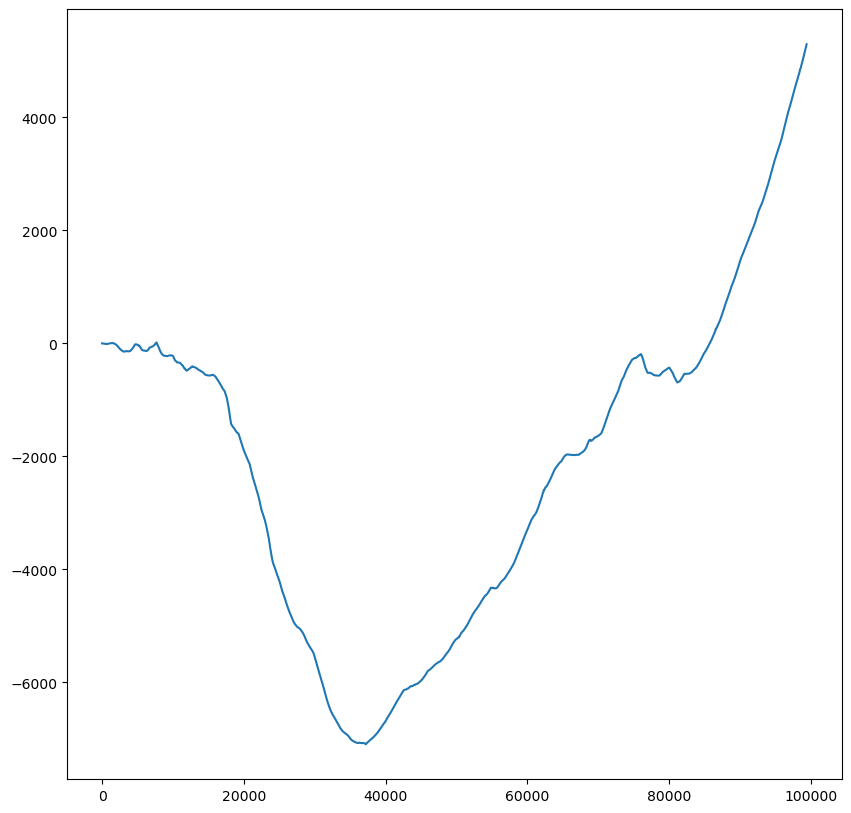

Number of trades: 99390
Average profit per trade: -2180.918482675626
Win rate: 0.147399134721803


In [36]:
temp=[]
def backtest_strategy( initial_portfolio_value):
    portfolio_value = initial_portfolio_value
    position = 0
    entry_price = 0
    entry_tte = 0
    for i in range(len(df)):
        if position == 0:
            if df['signal'].iloc[i] == 1:
                position = 1
                entry_price = df['iv_spread'].iloc[i]
                entry_tte = df['tte'].iloc[i]
                trade_value = portfolio_value * 1
            elif df['signal'].iloc[i] == -1:
                position = -1
                entry_price = df['iv_spread'].iloc[i]
                entry_tte = df['tte'].iloc[i]
                trade_value = portfolio_value * 1
        else:
            if((position==1 and df['z_score'].iloc[i]>neg_threshold)or(position==-1 and df['z_score'].iloc[i]<pos_threshold)):
                profit = calculate_profit(df['iv_spread'].iloc[i],entry_price,position, entry_tte)
                print(profit)
                portfolio_value+=profit
                temp.append(portfolio_value)
# Example usage # Assumes you have a CSV file with 'BankNiftyIV', 'NiftyIV', and 'TTE' columns
backtest_strategy(initial_portfolio_value)
import matplotlib.pyplot as plt
temp=np.array(temp)-100000
plt.figure(figsize=(10,10))
plt.plot(temp)
plt.show()
print(f"Number of trades: {len(temp)}")
print(f"Average profit per trade:", np.mean(temp))
print(f"Win rate: {sum(x > 0 for x in temp) / len(temp)}")

/var/folders/p_/rsx23pcs0j98ttq4g2448_kc0000gn/T/ipykernel_22255/633566758.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['z_score'][i] > entry_z_score_threshold and data['rsi'][i] < rsi_upper:
/var/folders/p_/rsx23pcs0j98ttq4g2448_kc0000gn/T/ipykernel_22255/633566758.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['z_score'][i] < -entry_z_score_threshold and data['rsi'][i] > rsi_lower:
/var/folders/p_/rsx23pcs0j98ttq4g2448_kc0000gn/T/ipykernel_22255/633566758.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always b

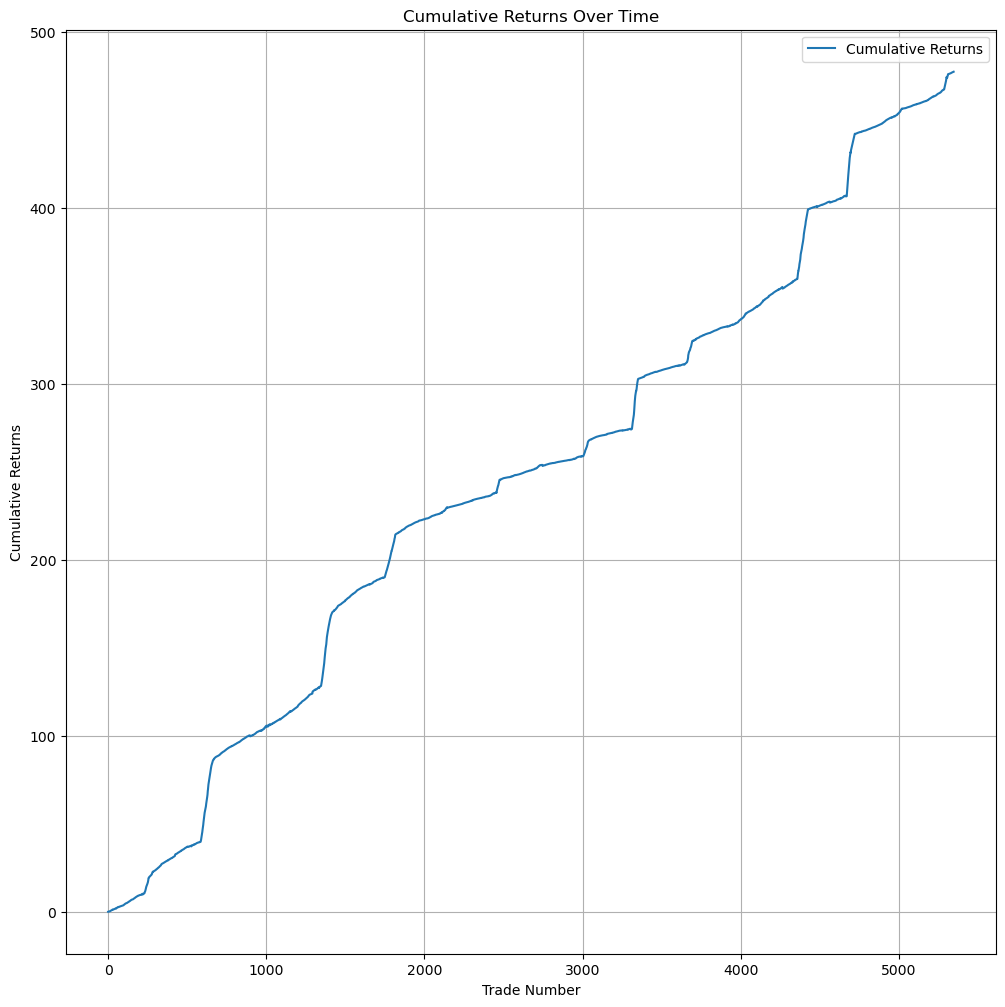

Total return: 477.19
Sharpe ratio: 309.30
Maximum drawdown: 0.06
Win rate: 93.73%


In [40]:
from pykalman import KalmanFilter
from ta.momentum import RSIIndicator
data = pd.read_csv('final_out.csv')
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)


data['iv_spread'] = data['bankniftys'] - data['niftys']

kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=0,
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.01)

state_means, _ = kf.filter(data['iv_spread'].values)

data['beta'] = state_means


window = 60
data['z_score'] = (data['iv_spread'] - data['iv_spread'].rolling(window=window).mean()) / data['iv_spread'].rolling(window=window).std()

rsi_window = 10
rsi_indicator = RSIIndicator(close=data['iv_spread'], window=rsi_window)
data['rsi'] = rsi_indicator.rsi()


entry_z_score_threshold = 1.5
exit_z_score_threshold = 0.5
rsi_upper = 70
rsi_lower = 30
holding_period = 45
risk_percent = 0.1
in_trade = False
entry_spread = 0
entry_time = None
position = 0
trades = []
positions = []
for i in range(len(data)):
    if i < window:
        positions.append(0)
        continue

    # Entry logic
    if not in_trade:
        if data['z_score'][i] > entry_z_score_threshold and data['rsi'][i] < rsi_upper:

            in_trade = True
            entry_spread = data['iv_spread'][i]
            entry_time = data.index[i]
            position = -1
        elif data['z_score'][i] < -entry_z_score_threshold and data['rsi'][i] > rsi_lower:

            in_trade = True
            entry_spread = data['iv_spread'][i]
            entry_time = data.index[i]
            position = 1
        else:
            position = 0
    else:
        if ((data['z_score'][i] < exit_z_score_threshold and position == -1) or
            (data['z_score'][i] > -exit_z_score_threshold and position == 1) or
            (data.index[i] - entry_time).total_seconds() / 60 >= holding_period):
            pnl = position * (data['iv_spread'][i] - entry_spread)
            trades.append(pnl)
            in_trade = False
            position = 0

    positions.append(position)

data['position'] = positions
cumulative_returns = np.cumsum(trades)

plt.figure(figsize=(12, 12))
plt.plot(np.arange(len(cumulative_returns)), cumulative_returns, label='Cumulative Returns')
plt.xlabel('Trade Number')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.show()

total_return = cumulative_returns[-1]
sharpe_ratio = np.mean(trades) / np.std(trades) * np.sqrt(252 * 1440)
max_drawdown = np.min(cumulative_returns)
win_rate = np.mean([x > 0 for x in trades])

print(f"Total return: {total_return:.2f}")
print(f"Sharpe ratio: {sharpe_ratio:.2f}")
print(f"Maximum drawdown: {max_drawdown:.2f}")
print(f"Win rate: {win_rate:.2%}")